<a href="https://colab.research.google.com/github/ishaak15/UNSW-IDS-Feature-Selection/blob/main/Copy_of_Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn import datasets, preprocessing, feature_extraction, neighbors
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.model_selection import train_test_split
from copy import copy
import urllib
import csv

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from zipfile import ZipFile
import collections

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [78]:
!git clone https://github.com/ishaak15/UNSW-IDS-Feature-Selection.git

Cloning into 'UNSW-IDS-Feature-Selection'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 61 (delta 7), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (61/61), done.


In [79]:
cd UNSW-IDS-Feature-Selection/

/content/UNSW-IDS-Feature-Selection/UNSW-IDS-Feature-Selection/UNSW-IDS-Feature-Selection


In [80]:
ls

bayes_10.sav   clfKNN20.sav                        README.md
bayes_20.sav   clfKNN_all.sav                      Testset1.csv
bayes_all.sav  Copy_of_Training_and_Testing.ipynb  Testset2.csv
clfDT_10.sav   Dataset1.csv                        Testset3.csv
clfDT_20.sav   Dataset2.csv                        Training_and_Testing.ipynb
clfDT_all.sav  Dataset3.csv                        UNSW_IDS_analysis.ipynb
clfKNN10.sav   LICENSE                             UNSW_NB15_testing-set.csv


In [81]:
df1 = pd.read_csv('Dataset1.csv',index_col=0)
df2 = pd.read_csv('Dataset2.csv',index_col=0)
df3 = pd.read_csv('Dataset3.csv',index_col=0)

In [82]:
tf1 = pd.read_csv('Testset1.csv',index_col=0)
tf2 = pd.read_csv('Testset2.csv',index_col=0)
tf3 = pd.read_csv('Testset3.csv',index_col=0)

In [83]:
df1_xtrain=df1.iloc[: , :-1]
df1_ytrain=df1.iloc[:,-1]
df2_xtrain=df2.iloc[: , :-1]
df2_ytrain=df2.iloc[:,-1]
df3_xtrain=df3.iloc[: , :-1]
df3_ytrain=df3.iloc[:,-1]

In [84]:
df1_xtest=tf1.iloc[: , :-1]
df1_ytest=tf1.iloc[:,-1]
df2_xtest=tf2.iloc[: , :-1]
df2_ytest=tf2.iloc[:,-1]
df3_xtest=tf3.iloc[: , :-1]
df3_ytest=tf3.iloc[:,-1]

In [85]:
#KNN

In [86]:
clfKNN10=neighbors.KNeighborsClassifier()
clfKNN10.fit(df1_xtrain,df1_ytrain)
#clfKNN10.fit(df1_xtrain,df1_ytrain)

print ("\t\tKNN Classification of UNSW-NB15\n\n\t\tTop 10 Features ")

yt_pred_10 = clfKNN10.predict(df1_xtest)
results = confusion_matrix(df1_ytest, yt_pred_10) 
print ('Confusion Matrix :')
print(results) 


accKNN10=accuracy_score(df1_ytest,yt_pred_10)
print("Accuracy: ",accKNN10)
preKNN10=precision_score(df1_ytest, yt_pred_10, average='macro')
print("Precision Score: ",preKNN10)
f1KNN10=f1_score(df1_ytest, yt_pred_10, average='macro')
print("F1 Score: ",f1KNN10)
reKNN10=recall_score(df1_ytest, yt_pred_10, average='macro')  
print("Recall: ",reKNN10)

		KNN Classification of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[  208   131    42    58   129    16    32    61     0     0]
 [  198   121    13    49   134    18    16    33     1     0]
 [  822   758   472   913   502    21   202   372    27     0]
 [  955   835   503  6664   944    39   616   540    33     3]
 [  444   315    97   469  3357    54  1111   164    50     1]
 [   17    11    34   375   168 18078   140    44     4     0]
 [  496    52   218  1986  7076    20 26822   233    93     4]
 [   82   102    51   324   117     5    71  2737     5     2]
 [    5     7    12    50   161     6    51    32    54     0]
 [    0     1     2    26    11     0     3     0     0     1]]
Accuracy:  0.7107078657144246
Precision Score:  0.41756373950870634
F1 Score:  0.4023931552335053
Recall:  0.44140047486900985


In [87]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df2_xtrain,df2_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

y_pred_20 = clfKNN20.predict(df2_xtest)
results = confusion_matrix(df2_ytest, y_pred_20) 
print ('Confusion Matrix :')
print(results) 


accKNN20=accuracy_score(df2_ytest,y_pred_20)
print("Accuracy: ",accKNN20)
preKNN20=precision_score(df2_ytest, y_pred_20, average='macro')
print("Precision Score: ",preKNN20)
f1KNN20=f1_score(df2_ytest, y_pred_20, average='macro')
print("F1 Score: ",f1KNN20)
reKNN20=recall_score(df2_ytest, y_pred_20, average='macro')  
print("Recall: ",reKNN20)

		KNN Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[  267   167    15    69   117    16    17     9     0     0]
 [  251   109     6    65   118    18    11     5     0     0]
 [ 1150  1136   184   646   494    22   307   129    21     0]
 [ 1321  1139   396  4316  1854    39  1749   290    28     0]
 [  599   332   140  2053  1702    56  1023   122    35     0]
 [   30    22    26   304   220 18083   132    51     3     0]
 [  132    71   537  7955  4981    21 22760   473    69     1]
 [  126   152    91   985   400     7   405  1325     5     0]
 [    7     6    13   109   126     5    52    17    43     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5925885439440315
Precision Score:  0.3273066113090913
F1 Score:  0.3053129978339978
Recall:  0.336096541715301


In [88]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df3_xtrain,df3_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tAll Features ")

y_pred_all = clfKNN20.predict(df3_xtest)
results = confusion_matrix(df3_ytest, y_pred_all) 
print ('Confusion Matrix :')
print(results) 


accKNNall=accuracy_score(df3_ytest, y_pred_all)
print("Accuracy: ",accKNNall)
preKNNall=precision_score(df3_ytest, y_pred_all, average='macro')
print("Precision Score: ",preKNNall)
f1KNNall=f1_score(df3_ytest, y_pred_all, average='macro')
print("F1 Score: ",f1KNNall)
reKNNall=recall_score(df3_ytest, y_pred_all, average='macro')  
print("Recall: ",reKNNall)


		KNN Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  336   161     1    44   101    16    17     1     0     0]
 [  304    98     1    44   105    18    11     2     0     0]
 [ 1491  1070   101   581   437    22   305    61    21     0]
 [ 1671  1073   319  4245  1794    39  1743   220    28     0]
 [  726   307   123  2007  1672    56  1024   112    35     0]
 [   37    21    26   301   219 18083   130    51     3     0]
 [  115    55   537  7955  5009    21 22765   473    69     1]
 [  164   146    81   981   392     7   405  1315     5     0]
 [    6     3    13   109   132     5    50    16    44     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5910095710051985
Precision Score:  0.3265665197965294
F1 Score:  0.3034833731074776
Recall:  0.34123127222810123


In [89]:
#Decision TREE

In [90]:
clfDT_10 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")

# Train Decision Tree Classifer
clfDT_10 = clfDT_10.fit(df1_xtrain,df1_ytrain)

#Predict the response for test dataset
y_pred_DT10 = clfDT_10.predict(df1_xtest)


#print ("\t\tMajor Verifcation")
results_DT10 = confusion_matrix(df1_ytest, y_pred_DT10) 
print ('Confusion Matrix :')
print(results_DT10) 

accDT10=accuracy_score(df1_ytest, y_pred_DT10)
preDT10=precision_score(df1_ytest, y_pred_DT10, average='macro')
f1DT10=f1_score(df1_ytest, y_pred_DT10, average='macro')
reDT10=recall_score(df1_ytest, y_pred_DT10, average='macro')

print ('Accuracy Score :',accDT10 )
print("Precision Score: ",preDT10)
print("F1 Score: ",f1DT10)
print("Recall: ",reDT10)

		Decision Tree Analysis of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[  375    82     1     5   187     0    27     0     0     0]
 [  319    54     3    11   189     1     3     0     3     0]
 [ 1490  1020   532   523   372    30    60    23    38     1]
 [ 1711   958   594  6482   629   149   233   233   129    14]
 [  722   151   204   498  2876    41  1314     3   250     3]
 [   20    23    62   227    49 18444    20     3    17     6]
 [  597     9  1057  1113  7324   188 26556    15   140     1]
 [  158   142    41   270    46     8    36  2758    35     2]
 [    1     4    13    43    27     5    11     6   268     0]
 [    0     0     0    12     0     1     1     0     1    29]]
Accuracy Score : 0.7090074333187582
Precision Score:  0.49017148697366936
F1 Score:  0.4923395380995279
Recall:  0.5685449667302843


In [91]:
clfDT_20 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

# Train Decision Tree Classifer
clfDT_20 = clfDT_20.fit(df2_xtrain,df2_ytrain)

#Predict the response for test dataset
y_pred_DT20 = clfDT_20.predict(df2_xtest)


#print ("\t\tMajor Verifcation")
results_DT20 = confusion_matrix(df2_ytest, y_pred_DT20) 
print ('Confusion Matrix :')
print(results_DT20)

accDT20=accuracy_score(df2_ytest, y_pred_DT20)
preDT20=precision_score(df2_ytest, y_pred_DT20, average='macro')
f1DT20=f1_score(df2_ytest, y_pred_DT20, average='macro')
reDT20=recall_score(df2_ytest, y_pred_DT20, average='macro')

print ('Accuracy Score :',accDT20 )
print("Precision Score: ",preDT20)
print("F1 Score: ",f1DT20)
print("Recall: ",reDT20)

		Decision Tree Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[  506   118     0    31     1     3    15     0     3     0]
 [  491    52     3    12     8     0    13     0     4     0]
 [ 1735  1045   551   504    92    28    74    26    34     0]
 [ 2089   985   724  6457   175    83   273   240    97     9]
 [ 1070   157    90   384  2700    25  1450    15   170     1]
 [   26    29    66   193    39 18475    15     7    16     5]
 [  685    11   168   799  7474    56 27610    51   145     1]
 [  163   145    40   277    25     3    39  2757    46     1]
 [    1     8    16    45    30     4    15     4   255     0]
 [    0     0     1    17     0     1     0     1     1    23]]
Accuracy Score : 0.721299130350289
Precision Score:  0.5143686274709648
F1 Score:  0.49783020543757195
Recall:  0.5707975393489334


In [92]:
clfDT_all = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tAll Features ")

# Train Decision Tree Classifer
clfDT_all = clfDT_all.fit(df3_xtrain,df3_ytrain)

#Predict the response for test dataset
y_pred_DTall = clfDT_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation")
results_DTall = confusion_matrix(df3_ytest, y_pred_DTall) 
print ('Confusion Matrix :')
print(results_DTall)

accDTall=accuracy_score(df3_ytest, y_pred_DTall)
preDTall=precision_score(df3_ytest, y_pred_DTall, average='macro')
f1DTall=f1_score(df3_ytest, y_pred_DTall, average='macro')
reDTall=recall_score(df3_ytest, y_pred_DTall, average='macro')

print ('Accuracy Score :', accDTall)
print("Precision Score: ",preDTall)
print("F1 Score: ",f1DTall)
print("Recall: ",reDTall)


		Decision Tree Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  495   117     1    53     0     1     8     0     2     0]
 [  485    66     1    10     5     0    12     0     4     0]
 [ 1681  1143   555   497    54    34    62    26    37     0]
 [ 2048  1089   549  6491   147    83   409   224    85     7]
 [ 1043   190    82   368  2685    21  1525     5   143     0]
 [   24    25    69   249    31 18427    19     5    16     6]
 [  691    10   141   808  7422    40 27704    51   132     1]
 [  162   177    38   284    12     2    30  2748    42     1]
 [    0     6    14    58    31     3    10     4   252     0]
 [    0     0     3    15     0     1     0     2     0    23]]
Accuracy Score : 0.722027887091289
Precision Score:  0.5249027506105863
F1 Score:  0.5024805712118786
Recall:  0.570678509989761


In [95]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [96]:
print(df1_ytrain.unique())

[6 1 0 4 8 7 3 2 9 5]


In [97]:
bayes_10 = MultinomialNB()
#bayes_10.partial_fit(df1_xtrain,df1_ytrain,df1_ytrain.unique())
bayes_10.fit(df1_xtrain,df1_ytrain)

print ("\t\tGaussain Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")
y_pred_gnb10 = bayes_10.predict(df1_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df1_ytest, y_pred_gnb10) 
print ('Confusion Matrix :')
print(results) 

accbayes_10=accuracy_score(df1_ytest, y_pred_gnb10) 
prebayes_10=precision_score(df1_ytest, y_pred_gnb10, average='macro')
f1bayes_10=f1_score(df1_ytest, y_pred_gnb10, average='macro')
rebayes_10=recall_score(df1_ytest, y_pred_gnb10, average='macro')

print ('Accuracy Score :',accbayes_10)
print("Precision Score: ",prebayes_10)
print("F1 Score: ",f1bayes_10)
print("Recall: ",rebayes_10)


		Gaussain Naive Bayes Analysis of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[  601     0     0    14     0     1    61     0     0     0]
 [  483     0     0    38     1     2    59     0     0     0]
 [ 2473     0     0   510    72    78   934    10    12     0]
 [ 2697     0     0  1738   125    56  6494     2    20     0]
 [ 1222     0     0   752   550   374  3111     7    46     0]
 [   28     0     0   109    95 18159   475     1     4     0]
 [  193     0     1  4062  1501  2792 28284    18   149     0]
 [ 1541     0     0    68     8    15  1858     6     0     0]
 [   75     0     0     1    36     9   192     6    59     0]
 [    0     0     0     2     4     2    36     0     0     0]]
Accuracy Score : 0.5999732789194967
Precision Score:  0.23827456767032631
F1 Score:  0.2239561902839405
Recall:  0.30190991296773395


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [98]:
bayes_20 = MultinomialNB()
bayes_20.fit(df2_xtrain,df2_ytrain)

print ("\t\tGaussian Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

y_pred_gnb20 = bayes_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df2_ytest, y_pred_gnb20) 
print ('Confusion Matrix :')
print(results)

accbayes_20=accuracy_score(df2_ytest, y_pred_gnb20) 
prebayes_20=precision_score(df2_ytest, y_pred_gnb20, average='macro')
f1bayes_20=f1_score(df2_ytest, y_pred_gnb20, average='macro')
rebayes_20=recall_score(df2_ytest, y_pred_gnb20, average='macro')

print ('Accuracy Score :',accbayes_20)
print("Precision Score: ",prebayes_20)
print("F1 Score: ",f1bayes_20)
print("Recall: ",rebayes_20)


		Gaussian Naive Bayes Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  585     0    73 14651     0  5965  7847     1     1  7877]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.3825244133508235
Precision Score:  0.1947161142507347
F1 Score:  0.135809387243145
Recall:  0.19951131812748615


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [99]:
bayes_all = MultinomialNB()
bayes_all.fit(df3_xtrain,df3_ytrain)

print ("\t\tGaussian Naive Bayes Analysis of UNSW-NB15\n\n\t\tAll Features ")
y_pred_gnball = bayes_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df3_ytest, y_pred_gnball) 
print ('Confusion Matrix :')
print(results)

accbayes_all=accuracy_score(df3_ytest, y_pred_gnball)
prebayes_all=precision_score(df3_ytest, y_pred_gnball, average='macro')
f1bayes_all=f1_score(df3_ytest, y_pred_gnball, average='macro')
rebayes_all=recall_score(df3_ytest, y_pred_gnball, average='macro')

print ('Accuracy Score :', accbayes_all)
print("Precision Score: ",prebayes_all)
print("F1 Score: ",f1bayes_all)
print("Recall: ",rebayes_all)


		Gaussian Naive Bayes Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  615     0    14 14654     0  6027  7813     1     1  7875]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.38211145119759027
Precision Score:  0.1988094523267321
F1 Score:  0.13564830638485165
Recall:  0.19941942623559425


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [100]:
#Random Forest Classifier 


In [101]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")

#Create a Gaussian Classifier
clfRF_10=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_10.fit(df1_xtrain,df1_ytrain)

y_pred_RF10=clfRF_10.predict(df1_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_10 = confusion_matrix(df1_ytest, y_pred_RF10) 
print ('Confusion Matrix :')
print(results_10) 

accclfRF_10=accuracy_score(df1_ytest, y_pred_RF10)
preclfRF_10=precision_score(df1_ytest, y_pred_RF10, average='macro')
f1clfRF_10=f1_score(df1_ytest, y_pred_RF10, average='macro')
reclfRF_10=recall_score(df1_ytest, y_pred_RF10, average='macro')

print ('Accuracy Score :',accclfRF_10 )
print("Precision Score: ",preclfRF_10)
print("F1 Score: ",f1clfRF_10)
print("Recall: ",reclfRF_10)


		Random Forest Analysis of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[   48   110    19    64   383     0    23    27     3     0]
 [   34    68    14    22   396     0    21    20     8     0]
 [  351  1357   542   735   807    14    39   197    46     1]
 [  358  1258   222  7477  1257    14   151   305    85     5]
 [  103   218    34   408  4021     3  1014    49   212     0]
 [    4     8    40   396    67 18321     7     6    20     2]
 [  306     1    56   737  7451     7 28319     7   115     1]
 [   42   176    30   314    90     0    19  2795    30     0]
 [    0     1    13    48    33     0     9     3   270     1]
 [    0     0     0    21     1     1     1     0     0    20]]
Accuracy Score : 0.7516032648301997
Precision Score:  0.5410475653187922
F1 Score:  0.5038844225685519
Recall:  0.5359618986202608


In [102]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

#Create a Gaussian Classifier
clfRF_20=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_20.fit(df2_xtrain,df2_ytrain)

y_pred_RF20=clfRF_20.predict(df2_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_20 = confusion_matrix(df2_ytest, y_pred_RF20) 
print ('Confusion Matrix :')
print(results_20) 

accclfRF_20=accuracy_score(df2_ytest, y_pred_RF20) 
preclfRF_20=precision_score(df2_ytest, y_pred_RF20, average='macro')
f1clfRF_20=f1_score(df2_ytest, y_pred_RF20, average='macro')
reclfRF_20=recall_score(df2_ytest, y_pred_RF20, average='macro')

print ('Accuracy Score :',accclfRF_20)
print("Precision Score: ",preclfRF_20)
print("F1 Score: ",f1clfRF_20)
print("Recall: ",reclfRF_20)


		Random Forest Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[   40   234    11    44   252     4    20    69     3     0]
 [   39   167    10    22   255    10     4    70     6     0]
 [  518  1382   483   803   638    29    12   183    40     1]
 [  534  1388   134  7610   934    32    92   345    59     4]
 [  132   403    22   368  3856    10   912   141   218     0]
 [    2     7    42   390    51 18345     5     6    18     5]
 [  402     1    29   732  7584     6 28122     6   118     0]
 [   63   162    25   324    83     0     8  2804    27     0]
 [    0     0     8    57    38     1     7     1   265     1]
 [    0     0     0    29     2     1     1     0     0    11]]
Accuracy Score : 0.7494412864985668
Precision Score:  0.5298315485436575
F1 Score:  0.48297007914773227
Recall:  0.5268662182474247


In [103]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

#Create a Random Forest Classifier
clfRF_all=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_all.fit(df3_xtrain,df3_ytrain)

y_pred_RFall=clfRF_all.predict(df3_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_all = confusion_matrix(df3_ytest, y_pred_RFall) 
print ('Confusion Matrix :')
print(results_all) 

accclfRF_all=accuracy_score(df3_ytest, y_pred_RFall) 
preclfRF_all=precision_score(df3_ytest, y_pred_RFall, average='macro')
f1clfRF_all=f1_score(df3_ytest, y_pred_RFall, average='macro')
reclfRF_all=recall_score(df3_ytest, y_pred_RFall, average='macro')

print ('Accuracy Score :',accclfRF_all)
print("Precision Score: ",preclfRF_all)
print("F1 Score: ",f1clfRF_all)
print("Recall: ",reclfRF_all)


		Random Forest Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[   45   264     9    56   218     0    12    70     3     0]
 [   45   180    13    31   229     6     1    72     6     0]
 [  397  1711   452   750   533    25    16   164    41     0]
 [  419  1715   121  7543   794    29    91   343    75     2]
 [  122   467    30   348  3817     1   957   140   180     0]
 [    2     8    39   394    53 18342     7     5    19     2]
 [  478     0    22   730  7529     7 28101     7   125     1]
 [   47   208    19   314    73     1     6  2803    25     0]
 [    0     0     9    48    47     0     7     2   264     1]
 [    0     0     0    29     2     1     2     0     0    10]]
Accuracy Score : 0.7476679784288005
Precision Score:  0.5443632572389877
F1 Score:  0.4827502039330649
Recall:  0.5251927284001812


In [104]:
#Logistic Regression Classifier 


In [105]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")

logisticRegr_10 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_10.fit(df1_xtrain,df1_ytrain)

y_pred_LR10 = logisticRegr_10.predict(df1_xtest)

results_LR10 = confusion_matrix(df1_ytest, y_pred_LR10) 
print ('Confusion Matrix :')
print(results_LR10) 

acclogisticRegr_10=accuracy_score(df1_ytest, y_pred_LR10)
prelogisticRegr_10=precision_score(df1_ytest, y_pred_LR10, average='macro')
f1logisticRegr_10=f1_score(df1_ytest, y_pred_LR10, average='macro')
relogisticRegr_10=recall_score(df1_ytest, y_pred_LR10, average='macro')

print ('Accuracy Score :',acclogisticRegr_10 )
print("Precision Score: ",prelogisticRegr_10)
print("F1 Score: ",f1logisticRegr_10)
print("Recall: ",relogisticRegr_10)


		Logistic Regression Analysis of UNSW-NB15

		Top 10 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge



KeyboardInterrupt: ignored

In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW NB15\n\n\t\tTop 20 Features ")

logisticRegr_20 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_20.fit(df2_xtrain,df2_ytrain)

y_pred_LR20 = logisticRegr_20.predict(df2_xtest)

results_LR20 = confusion_matrix(df2_ytest, y_pred_LR20) 
print ('Confusion Matrix :')
print(results_LR20) 

acclogisticRegr_20=accuracy_score(df2_ytest, y_pred_LR20)
prelogisticRegr_20=precision_score(df2_ytest, y_pred_LR20, average='macro')
f1logisticRegr_20=f1_score(df2_ytest, y_pred_LR20, average='macro')
relogisticRegr_20=recall_score(df2_ytest, y_pred_LR20, average='macro')

print ('Accuracy Score :',acclogisticRegr_20 )
print("Precision Score: ",prelogisticRegr_20)
print("F1 Score: ",f1logisticRegr_20)
print("Recall: ",relogisticRegr_20)


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

logisticRegr_all = LogisticRegression(C=1e5, solver='Newton-cg', multi_class='multinomial')

logisticRegr_all.fit(df3_xtrain,df3_ytrain)

y_pred_LRall = logisticRegr_all.predict(df3_xtest)

results_LRall = confusion_matrix(df3_ytest, y_pred_LRall) 
print ('Confusion Matrix :')
print(results_LRall) 

acclogisticRegr_all=accuracy_score(df3_ytest, y_pred_LRall)
prelogisticRegr_all=precision_score(df3_ytest, y_pred_LRall, average='macro')
f1logisticRegr_all=f1_score(df3_ytest, y_pred_LRall, average='macro')
relogisticRegr_all=recall_score(df3_ytest, y_pred_LRall, average='macro')

print ('Accuracy Score :', acclogisticRegr_all)
print("Precision Score: ",prelogisticRegr_all)
print("F1 Score: ",f1logisticRegr_all)
print("Recall: ",relogisticRegr_all)



In [106]:
X = df1_xtrain
Y = df1_ytrain
C = df3_ytest
T = df1_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df1_xtrain.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_shape=(15, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 15, 10)            20        
_________________________________________________________________
flatten_6 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)                4832      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                330       
Total params: 5,182
Trainable params: 5,182
Non-trainable params: 0
_________________________________________________________________


In [107]:
historyNN10 = model.fit(X_train, y_train,
                    epochs=100 #,
                    #verbose=False
                    )

Epoch 1/100
3367/3367 [==============================] - 5s 1ms/step - loss: 1.4607 - accuracy: 0.4795
Epoch 2/100
3367/3367 [==============================] - 5s 1ms/step - loss: 1.2223 - accuracy: 0.5120
Epoch 3/100
3367/3367 [==============================] - 4s 1ms/step - loss: 1.1439 - accuracy: 0.5491
Epoch 4/100
3367/3367 [==============================] - 5s 1ms/step - loss: 1.1026 - accuracy: 0.5686
Epoch 5/100
3367/3367 [==============================] - 4s 1ms/step - loss: 1.0732 - accuracy: 0.5836
Epoch 6/100
3367/3367 [==============================] - 5s 1ms/step - loss: 1.0490 - accuracy: 0.5952
Epoch 7/100
3367/3367 [==============================] - 4s 1ms/step - loss: 1.0302 - accuracy: 0.6058
Epoch 8/100
3367/3367 [==============================] - 5s 1ms/step - loss: 1.0106 - accuracy: 0.6168
Epoch 9/100
3367/3367 [==============================] - 4s 1ms/step - loss: 0.9911 - accuracy: 0.6285
Epoch 10/100
3367/3367 [==============================] - 4s 1ms/step - l

In [108]:
loss, accNN10 = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accNN10))

#loss, accuracy = model.evaluate(y_test, X_test, verbose=True)
#print("Testing Accuracy:  {:.4f}".format(accuracy))


3367/3367 [==============================] - 4s 1ms/step - loss: 0.7015 - accuracy: 0.7318
Training Accuracy: 0.7318


In [109]:
#CNN 1D
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
#from sklearn.cross_validation import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [110]:
X = df1_xtrain
Y = df1_ytrain
C = df3_ytest
T = df1_xtest



In [111]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


cnn = Sequential()
cnn.add(Convolution1D(64, 1, activation="relu",input_shape=(15, 1)))
#cnn.add(MaxPooling1D(pool_length=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation="softmax"))

# define optimizer and objective, compile cnn

cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

# train
checkpointer = callbacks.ModelCheckpoint(filepath="results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('results/cnn1results/cnntrainanalysis1.csv',separator=',', append=False)
historyCNN10=cnn.fit(X_train, y_train, batch_size=40 ,epochs=100)
#cnn.save("results/cnn1results/cnn_model.hdf5")
#,validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger]

loss, accCNN10 = cnn.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accCNN10))


Epoch 1/100
2694/2694 [==============================] - 11s 4ms/step - loss: 1.3833 - accuracy: 0.4974
Epoch 2/100
2694/2694 [==============================] - 10s 4ms/step - loss: 1.1875 - accuracy: 0.5397
Epoch 3/100
2694/2694 [==============================] - 10s 4ms/step - loss: 1.1451 - accuracy: 0.5558
Epoch 4/100
2694/2694 [==============================] - 10s 4ms/step - loss: 1.1082 - accuracy: 0.5775
Epoch 5/100
2694/2694 [==============================] - 10s 4ms/step - loss: 1.0737 - accuracy: 0.5889
Epoch 6/100
2694/2694 [==============================] - 10s 4ms/step - loss: 1.0714 - accuracy: 0.5907
Epoch 7/100
2694/2694 [==============================] - 10s 4ms/step - loss: 1.0582 - accuracy: 0.5989
Epoch 8/100
2694/2694 [==============================] - 11s 4ms/step - loss: 1.0480 - accuracy: 0.6016
Epoch 9/100
2694/2694 [==============================] - 10s 4ms/step - loss: 1.0381 - accuracy: 0.6040
Epoch 10/100
2694/2694 [==============================] - 10s 4m

In [112]:
#Ada Boost with DT
from sklearn.ensemble import AdaBoostClassifier


In [113]:
print ("\t\tAdaBoost using Decision Tree Analysis of UNSW NB15\n\n\t\tTop 10 Features ")



abc10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=500)
abc10.fit(df1_xtrain, df1_ytrain)

#Predict the response for test dataset
y_pred_Ada10 = abc10.predict(df1_xtest)


results_Ada10 = confusion_matrix(df1_ytest, y_pred_Ada10) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc10=accuracy_score(df1_ytest, y_pred_Ada10)
preabc10=precision_score(df1_ytest, y_pred_Ada10, average='macro')
f1abc10=f1_score(df1_ytest, y_pred_Ada10, average='macro')
reabc10=recall_score(df1_ytest, y_pred_Ada10, average='macro')

print ('Accuracy Score :', accabc10)
print("Precision Score: ",preabc10)
print("F1 Score: ",f1abc10)
print("Recall: ",reabc10)


		AdaBoost using Decision Tree Analysis of UNSW NB15

		Top 10 Features 
Confusion Matrix :
[[  281     4    60    51   206     0    62    13     0     0]
 [  179     6    61    97   214     1     8    13     4     0]
 [ 1862   134   237   854   525    69   168   200    38     2]
 [ 1854   155   390  6189   859   253   868   517    44     3]
 [  539    12   134   370  1076     2  3825    66    36     2]
 [   12     2    49   804    41 17849    89    15    10     0]
 [  440    23   170   908  3039    18 32249    20   127     6]
 [  216    28    22   196    78     7    87  2842    20     0]
 [    0     0    25    50    44     0    45    15   199     0]
 [    0     1     0    31     4     3     1     0     2     2]]
Accuracy Score : 0.7400524704853519
Precision Score:  0.4258598142157197
F1 Score:  0.41227831822646416
Recall:  0.4419058463727786


In [114]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

abc20 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME",n_estimators=500)
abc20.fit(df2_xtrain, df2_ytrain)

y_pred_Ada20 = abc20.predict(df2_xtest)



results_Ada10 = confusion_matrix(df2_ytest, y_pred_Ada20) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc20=accuracy_score(df2_ytest, y_pred_Ada20)
preabc20=precision_score(df2_ytest, y_pred_Ada20, average='macro')
f1abc20=f1_score(df2_ytest, y_pred_Ada20, average='macro')
reabc20=recall_score(df2_ytest, y_pred_Ada20, average='macro')

print ('Accuracy Score :', accabc20)
print("Precision Score: ",preabc20)
print("F1 Score: ",f1abc20)
print("Recall: ",reabc20)


		AdaBoost using DT Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[  424    57     3    18    44     0    55    76     0     0]
 [  359    45    15    24    51    11     4    71     3     0]
 [ 1378   689   331   926   328    32   108   252    39     6]
 [ 1640   687  1031  6096   478   219   363   553    40    25]
 [  826   133    82   151  1658    11  2933   194    53    21]
 [   13     6   260   370    56 18059    87     7    12     1]
 [  658     6   307   638  5201    27 30030    14   101    18]
 [  133   110    59   241    86     7    34  2820     5     1]
 [    0     2    36    54    45     0    36    12   193     0]
 [    0     0     5    31     2     2     2     0     0     2]]
Accuracy Score : 0.7246028275761551
Precision Score:  0.42216095049288327
F1 Score:  0.42151037141227066
Recall:  0.4736811250635452


In [115]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tAll Features ")

abcall = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=500)

abcall.fit(df3_xtrain,df3_ytrain)

y_pred_Adaall = abcall.predict(df3_xtest)

results_Adaall = confusion_matrix(df3_ytest, y_pred_Adaall) 
print ('Confusion Matrix :')
print(results_Adaall)

accabcall=accuracy_score(df3_ytest, y_pred_Adaall)
preabcall=precision_score(df3_ytest, y_pred_Adaall, average='macro')
f1abcall=f1_score(df3_ytest, y_pred_Adaall, average='macro')
reabcall=recall_score(df3_ytest, y_pred_Adaall, average='macro')

print ('Accuracy Score :', accabcall)
print("Precision Score: ",preabcall)
print("F1 Score: ",f1abcall)
print("Recall: ",reabcall)

		AdaBoost using DT Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  249    47   164    14    21    34    26   122     0     0]
 [  187    89   159    23    26    10     0    89     0     0]
 [  977   503   493   591   129   142   139  1115     0     0]
 [ 1516   832   956  3556   150   892  1299  1930     0     1]
 [  441   648   724  1154  1237   999   233   626     0     0]
 [   17    42    75   356     6 14065    41  4269     0     0]
 [ 2178  1236  1812  4189  5753  1274 15575  4983     0     0]
 [   85   129    52    69    20    14     2  3125     0     0]
 [    0    67    72   168     6     0     0    65     0     0]
 [    0     0     5    11     0     1     0    27     0     0]]
Accuracy Score : 0.4662707088373901
Precision Score:  0.2594977036850702
F1 Score:  0.24182434495918598
Recall:  0.32246708489366177


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [116]:
!pip install vecstack

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=0a50b6bd99fce7e7649241f7e3c71a8b09b3bbfc22252bc3d7bbf2b44a445065
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [117]:
models = [
    KNeighborsClassifier(),
        
    RandomForestClassifier(n_estimators=500, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [118]:
S_train, S_test = stacking(models, df1_xtrain, df1_ytrain, df1_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.73357156]
    fold  1:  [0.74108966]
    fold  2:  [0.73417487]
    fold  3:  [0.73937256]
    fold  4:  [0.74043995]
    ----
    MEAN:     [0.73772972] + [0.00320190]
    FULL:     [0.73772972]

model  1:     [RandomForestClassifier]
    fold  0:  [0.72558938]
    fold  1:  [0.73208650]
    fold  2:  [0.72647113]
    fold  3:  [0.73454613]
    fold  4:  [0.72985892]
    ----
    MEAN:     [0.72971041] + [0.00336238]
    FULL:     [0.72971041]

model  2:     [XGBClassifier]
    fold  0:  [0.78893633]
    fold  1:  [0.79547986]
    fold  2:  [0.79650084]
    fold  3:  [0.79961017]
    fold  4:  [0.79520141]
    ----
    MEAN:     [0.79514572] + [0.00347675]
    FULL:     [0.79514572]



In [119]:
XGB10 = XGBClassifier(random_state=1, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=300, max_depth=3)
    
XGB10 = XGB10.fit(S_train, df1_ytrain)

y_pred_XGB1 = XGB10.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, y_pred_XGB1))

results_XGB1 = confusion_matrix(df1_ytest, y_pred_XGB1) 
print ('Confusion Matrix :')
print(results_XGB1) 

accXGB10=accuracy_score(df1_ytest, y_pred_XGB1)
preXGB10=precision_score(df1_ytest, y_pred_XGB1, average='macro')
f1XGB10=f1_score(df1_ytest, y_pred_XGB1, average='macro')
reXGB10=recall_score(df1_ytest, y_pred_XGB1, average='macro')

print ('Accuracy Score :', accXGB10)
print("Precision Score: ",preXGB10)
print("F1 Score: ",f1XGB10)
print("Recall: ",reXGB10)

Final prediction score: [0.73414]
Confusion Matrix :
[[    1     0     0     8   613     0    52     3     0     0]
 [    1    21     1    32   513     0     7     4     4     0]
 [    8    46    70  1026  2786     2    44    45    62     0]
 [    7    29    32  7274  3233     0   307   182    66     2]
 [    1     7     1   138  4825     0   941    54    95     0]
 [    0     4    13   495   163 18159    18     8    10     1]
 [    1     0    17  1076  8764     0 27035    33    73     1]
 [    2     6     2   291   348     0     6  2828    13     0]
 [    0     1     2    55    65     0    10    30   215     0]
 [    0     0     1    22     5     0     1     0     0    15]]
Accuracy Score : 0.7341373949375698
Precision Score:  0.5687654692981967
F1 Score:  0.47229960499373336
Recall:  0.49155527405923394


In [120]:
S_train2, S_test2 = stacking(models, df2_xtrain, df2_ytrain, df2_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

XGB20 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
XGB20 = XGB20.fit(S_train2, df2_ytrain)

y_pred_XGB2 = XGB20.predict(S_test2)

print('Final prediction score: [%.5f]' % accuracy_score(df2_ytest, y_pred_XGB2))


results_XGB2 = confusion_matrix(df2_ytest, y_pred_XGB2) 
print ('Confusion Matrix :')
print(results_XGB2) 

accXGB20=accuracy_score(df2_ytest, y_pred_XGB2)
preXGB20=precision_score(df2_ytest, y_pred_XGB2, average='macro')
f1XGB20=f1_score(df2_ytest, y_pred_XGB2, average='macro')
reXGB20=recall_score(df2_ytest, y_pred_XGB2, average='macro')

print ('Accuracy Score :',accXGB20 )
print("Precision Score: ",preXGB20)
print("F1 Score: ",f1XGB20)
print("Recall: ",reXGB20)


task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56775571]
    fold  1:  [0.56798775]
    fold  2:  [0.56993689]
    fold  3:  [0.56432151]
    fold  4:  [0.57156117]
    ----
    MEAN:     [0.56831260] + [0.00243047]
    FULL:     [0.56831260]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69932244]
    fold  1:  [0.70642287]
    fold  2:  [0.71111008]
    fold  3:  [0.71802487]
    fold  4:  [0.73087990]
    ----
    MEAN:     [0.71315203] + [0.01075854]
    FULL:     [0.71315203]

model  2:     [XGBClassifier]
    fold  0:  [0.79394839]
    fold  1:  [0.80165213]
    fold  2:  [0.79974940]
    fold  3:  [0.80466865]
    fold  4:  [0.80230184]
    ----
    MEAN:     [0.80046408] + [0.00361752]
    FULL:     [0.80046408]

Final prediction score: [0.73310]
Confusion Matrix :
[[   77   215     0     1   322     0    57     2     3     0]
 [   25

In [121]:

S_train3, S_test3 = stacking(models, df3_xtrain, df3_ytrain, df3_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)


XGBall = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
XGBall = XGBall.fit(S_train3, df3_ytrain)

y_pred_XGB3 = XGBall.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df3_ytest, y_pred_XGB3))

results_XGB3 = confusion_matrix(df3_ytest, y_pred_XGB3) 
print ('Confusion Matrix :')
print(results_XGB3) 

accXGBall=accuracy_score(df3_ytest, y_pred_XGB3)
preXGBall=precision_score(df3_ytest, y_pred_XGB3, average='macro')
f1XGBall=f1_score(df3_ytest, y_pred_XGB3, average='macro')
reXGBall=recall_score(df3_ytest, y_pred_XGB3, average='macro')

print ('Accuracy Score :', accXGBall)
print("Precision Score: ",preXGBall)
print("F1 Score: ",f1XGBall)
print("Recall: ",reXGBall)


task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56682755]
    fold  1:  [0.56585298]
    fold  2:  [0.56835901]
    fold  3:  [0.56283646]
    fold  4:  [0.57040097]
    ----
    MEAN:     [0.56685539] + [0.00252940]
    FULL:     [0.56685539]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69811583]
    fold  1:  [0.70405606]
    fold  2:  [0.70470577]
    fold  3:  [0.70591238]
    fold  4:  [0.70572675]
    ----
    MEAN:     [0.70370336] + [0.00287484]
    FULL:     [0.70370336]

model  2:     [XGBClassifier]
    fold  0:  [0.79227771]
    fold  1:  [0.79956376]
    fold  2:  [0.79942454]
    fold  3:  [0.80517913]
    fold  4:  [0.79933172]
    ----
    MEAN:     [0.79915537] + [0.00409532]
    FULL:     [0.79915537]

Final prediction score: [0.71095]
Confusion Matrix :
[[  138     0     0     8   479     0    49     3     0     0]
 [   91

In [122]:
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [123]:
level0 = list()
level0.append(('rf', RandomForestClassifier()))
#level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
# define meta learner model
print("Proceeding with: ",level0)
level1 = GradientBoostingClassifier(n_estimators=200)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
# fit the model on all available data
model.fit(df1_xtrain, df1_ytrain)
# make a prediction for one example

yhat = model.predict(df1_xtest)
#print('Predicted Class: %d' % (yhat))

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, yhat))

results_sc1 = confusion_matrix(df1_ytest, yhat) 
print ('Confusion Matrix :')
print(results_sc1) 

accensemble10=accuracy_score(df1_ytest, yhat)
preensemble10=precision_score(df1_ytest, yhat, average='macro')
f1ensemble10=f1_score(df1_ytest, yhat, average='macro')
reensemble10=recall_score(df1_ytest, yhat, average='macro')

print ('Accuracy Score :',accensemble10 )
print("Precision Score: ",preensemble10)
print("F1 Score: ",f1ensemble10)
print("Recall: ",reensemble10)


Proceeding with:  [('rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), ('cart', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitt

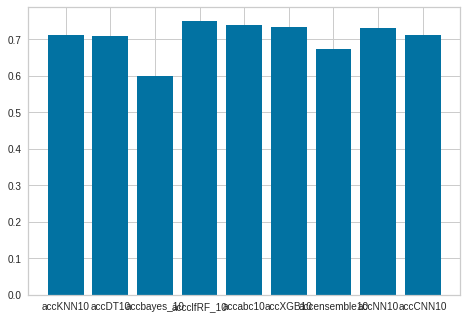

In [126]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['accKNN10', 'accDT10', 'accbayes_10', 'accclfRF_10',"accabc10","accXGB10","accensemble10","accNN10","accCNN10"]
acc = [accKNN10,accDT10,accbayes_10,accclfRF_10,accabc10,accXGB10,accensemble10,accNN10,accCNN10]
ax.bar(algo,acc)
plt.show()

In [ ]:
[accKNN10,preKNN10,f1KNN10,reKNN10][accDT10,preDT10,f1DT10,reDT10]
[accbayes_10,prebayes_10,f1bayes_10,rebayes_10][accclfRF_10,preclfRF_10,f1clfRF_10,reclfRF_10]
[acclogisticRegr_10,prelogisticRegr_10,f1logisticRegr_10,relogisticRegr_10]
[accabc10,preabc10,f1abc10,reabc10][accXGB10,preXGB10,f1XGB10,reXGB10]
[accensemble10,preensemble10,f1ensemble10,reensemble10]

[accNN10,historyNN10][accCNN10,historyCNN10]

